#### In the context of our final project for the CLA Data Science bootcamp we made this project as proof of the advancement we made during the whole period.
#### Our topic of research was AI in the medical field , our dataset is a set of brains (pictures and dataframe) healthy and affected with a tumour. Our purpose is to :
##### a) Analyse the data, prepare it if necessary , add some visualisations
##### b) Create a ML supervised model to predict the condition of the brain
##### c) Create a DL model to predict the condition of the brain
##### d) Compare the results 

## 1) Data Preparation

We start of course by importing the libraries that we will need

In [66]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog 
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
import cmath
import os
import itertools
import glob
import shutil

(This next code was made just to extract the files from our zip file)

In [67]:
from zipfile import ZipFile
file_name = "./data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Now we import and analyse our dataframe

In [68]:
df = pd.read_csv("Brain Tumor.csv")
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

We have 15 columns, with the first one being the Images that act as ID in this case, the second one being the class which is our target , and the rest will be our data features

In [70]:
#looking for missing values
df.isna().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

In [71]:
df=df.drop(["Image"],axis=1) #droping the ID as we do not need it

In [72]:
#scaling our data to manipulate it easier
scalable=['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']


df[scalable]=StandardScaler().fit_transform(df[scalable])
df

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713,-1.117857e-168
1,0,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377,-1.117857e-168
2,1,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636,-1.117857e-168
3,1,-0.616481,0.531896,0.660820,-1.026561,0.615188,0.160202,0.212525,-1.335154,-0.988223,-1.840334,1.622995,0.322041,-1.117857e-168
4,0,-0.379529,0.039451,0.208352,1.041256,0.070489,-0.094103,0.429532,1.075849,1.022442,0.171115,1.154744,0.650854,-1.117857e-168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,0,2.050827,1.064921,1.092779,-0.139892,-0.789131,-0.349862,0.278359,0.123407,-0.170487,0.061596,0.277439,-0.183335,1.338116e-167
3758,0,1.911290,1.104076,1.122668,-0.097345,-0.764704,-0.345702,0.303212,0.164116,-0.130150,0.183409,0.207915,-0.115377,1.338116e-167
3759,0,1.488082,0.942399,0.997760,-0.074100,-0.700765,-0.333342,0.357754,0.187301,-0.106751,0.101766,0.219037,-0.137095,1.338116e-167
3760,0,0.670746,0.501988,0.635006,0.203090,-0.534994,-0.294742,0.875475,0.439344,0.167517,0.006346,0.941273,-0.568517,1.338116e-167


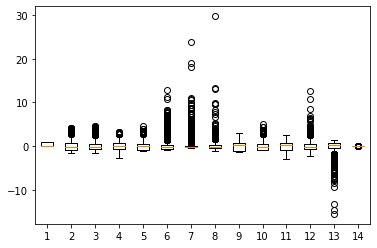

In [73]:
#a boxplot to visualise and check for outliers
plt.boxplot(df)
plt.show()

#### Observations :
- Our data is already all numerical so no need to change any of them.
- We have seen that our data has no missing values, which is good.
- We have also seen with our boxplot that some outliers are present in some features, but for the sake of our research we will say that they are accurate values and therefore won't be dealt with.

#### Now we will be adding more visualisations :

c:\Users\amine\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\amine\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution of image Homogenity, by Class')

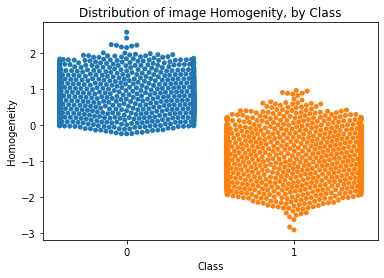

In [74]:
sns.swarmplot(x=df['Class'], y= df['Homogeneity'])
plt.title("Distribution of image Homogenity, by Class")

c:\Users\amine\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\amine\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


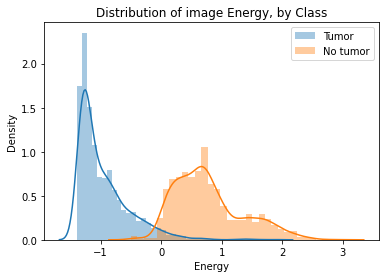

In [75]:
class1=df['Class']== 1
class0=df['Class']== 0
_data=df.copy()
sns.distplot(a= _data[class1]['Energy'], label="Tumor")
sns.distplot(a = _data[class0]['Energy'], label="No tumor" )

plt.title("Distribution of image Energy, by Class")
plt.legend()

In [76]:
df.corr()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Class,1.000000,-0.095729,0.308818,0.285568,-0.778180,0.402644,0.239844,0.212643,-0.862413,-0.758255,-0.847529,0.556319,-0.108601,NaN
Mean,-0.095729,1.000000,0.783027,0.790984,-0.099729,-0.601593,-0.358163,-0.050974,-0.014863,-0.109393,0.095556,-0.113864,0.293693,NaN
Variance,0.308818,0.783027,1.000000,0.975699,-0.344432,-0.347399,-0.248312,0.135494,-0.335470,-0.341061,-0.290527,0.235487,0.288037,NaN
Standard Deviation,0.285568,0.790984,0.975699,1.000000,-0.345127,-0.425428,-0.329798,0.117981,-0.331103,-0.342530,-0.288801,0.224773,0.354161,NaN
Entropy,-0.778180,-0.099729,-0.344432,-0.345127,1.000000,-0.222222,-0.140125,-0.140769,0.971260,0.999213,0.852019,-0.502363,0.122080,NaN
Skewness,0.402644,-0.601593,-0.347399,-0.425428,-0.222222,1.000000,0.899713,0.349856,-0.295413,-0.209289,-0.470054,0.511931,-0.570919,NaN
Kurtosis,0.239844,-0.358163,-0.248312,-0.329798,-0.140125,0.899713,1.000000,0.296664,-0.172454,-0.133741,-0.307314,0.375939,-0.589211,NaN
Contrast,0.212643,-0.050974,0.135494,0.117981,-0.140769,0.349856,0.296664,1.000000,-0.130708,-0.139276,-0.270119,0.761497,-0.427443,NaN
Energy,-0.862413,-0.014863,-0.335470,-0.331103,0.971260,-0.295413,-0.172454,-0.130708,1.000000,0.961628,0.915988,-0.545774,0.123680,NaN
ASM,-0.758255,-0.109393,-0.341061,-0.342530,0.999213,-0.209289,-0.133741,-0.139276,0.961628,1.000000,0.837139,-0.491813,0.121054,NaN


<AxesSubplot:>

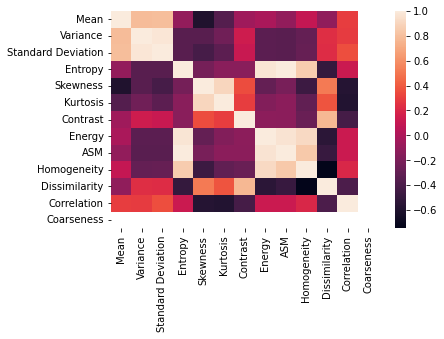

In [77]:
sns.heatmap(df.drop(["Class"],axis=1).corr())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


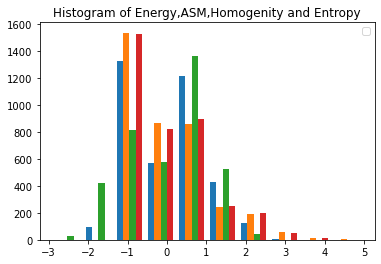

In [78]:
plt.hist(df[["Energy","ASM","Homogeneity","Entropy"]])
plt.title("Histogram of Energy,ASM,Homogenity and Entropy")
plt.legend()
plt.show()

#### Feature Selection

Based on our representations and our correlation heatmap we are going to reduce the number of our features, for instance : 
- The standard deviation and variation give about the same information so we will be keeping just the latter.
- The Coaresness feature doesn't seem to be giving any information.
- The Entropy, Energy, ASM and Homogenity features are highly correlated between them so we will be keeping just the homogenity.

In [79]:
df.columns

Index(['Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

In [80]:
df=df.drop(["Variance","Entropy","Energy","ASM","Coarseness"],axis=1)

In [81]:
df.columns

Index(['Class', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis',
       'Contrast', 'Homogeneity', 'Dissimilarity', 'Correlation'],
      dtype='object')

Now we are left with 8 features, we will save this new dataframe for our ML task

In [82]:
df.to_csv("clean_Brain Tumour.csv")

#### Image Visualisation 
It should also be noted that with our dataset comes a folder contraining the actual pictures, they will be needed in the DL task

Text(0.5, 1.0, 'No Tumor')

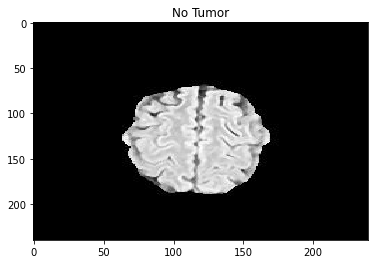

In [83]:
from natsort import natsorted 
fig = plt.figure()  
folder='./Brain Tumor/Brain Tumor/'
imgs=[os.path.join(folder,img) for img in os.listdir(folder) if img.endswith('.jpg')]
imgs=natsorted(imgs)

img=cv.imread(imgs[3760],cv.IMREAD_GRAYSCALE)

im = plt.imshow(img,  interpolation='none', aspect='auto',cmap ='gray', vmin=0, vmax=255)   
plt.title('No Tumor')